In [2]:
from datasets import load_dataset
uf = load_dataset("openbmb/UltraFeedback", split = "train")

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(
    "neuralmagic/Meta-Llama-3-8B-Instruct-quantized.w8a16",
    padding_side="right",
    trust_remote_code=True,
)

In [4]:
# get distribution of text lengths
from tqdm import tqdm, trange
length_iter = map(lambda x: len(tokenizer(x)["input_ids"]), uf["instruction"])
lengths = []
for elem in tqdm(length_iter, total=len(uf)):
    lengths.append(elem)

100%|██████████| 63967/63967 [00:19<00:00, 3269.88it/s]


<Axes: ylabel='Count'>

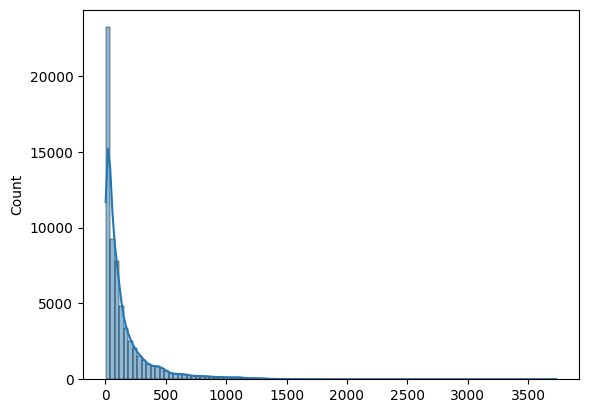

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(lengths, bins=100, kde = True)

In [16]:
import numpy as np
np.percentile(lengths, 80)

np.float64(230.0)

In [10]:
long_idxs = [i for i, x in enumerate(lengths) if x > 512]

In [14]:
print(uf["instruction"][long_idxs[-1]])

Can you summarize the difference between pull and push advertising and explain which approach may be more suitable for a particular product or service?
Generate according to: You will save yourself a considerable amount of time and money if you first determine your product’s (or service’s) suitability for "pull" and "push" advertising.
Pull advertising is geared to draw visitors to your website when they are actively seeking your product or service. Prime examples of pull advertising are search engine optimization, cost per click search engines, directory listings, yellow page ads, and shopping portals such as mySimon and DealTime.
Push advertising refers to all efforts to get the word out to an entire group of potential customers in order to hit the few that many be currently interested in your product or service. Most traditional offline advertising efforts (magazine, billboard, newspaper, tv, classifieds, etc) as well as online banners ads and email broadcasts are considered push ma